In [5]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import numpy
import pandas
import seaborn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
raw_mission_dataset = pandas.read_csv('/Users/joshfrazier/data/operations.csv')
raw_weather_dataset = pandas.read_csv('/Users/joshfrazier/data/weather_data/weather_summary.csv')

/Users/joshfrazier/theLibrary/articles-and-papers/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,8,11,13,31,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/joshfrazier/theLibrary/articles-and-papers/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
raw_weather_dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


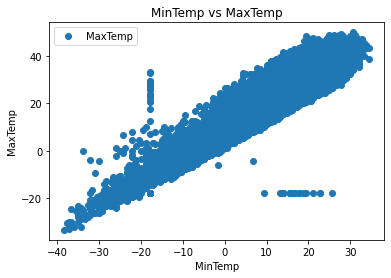

In [11]:
raw_weather_dataset.plot(x='MinTemp', y='MaxTemp', style='o')
pyplot.title('MinTemp vs MaxTemp')
pyplot.xlabel('MinTemp')
pyplot.ylabel('MaxTemp')
pyplot.show()

<AxesSubplot:xlabel='MaxTemp'>

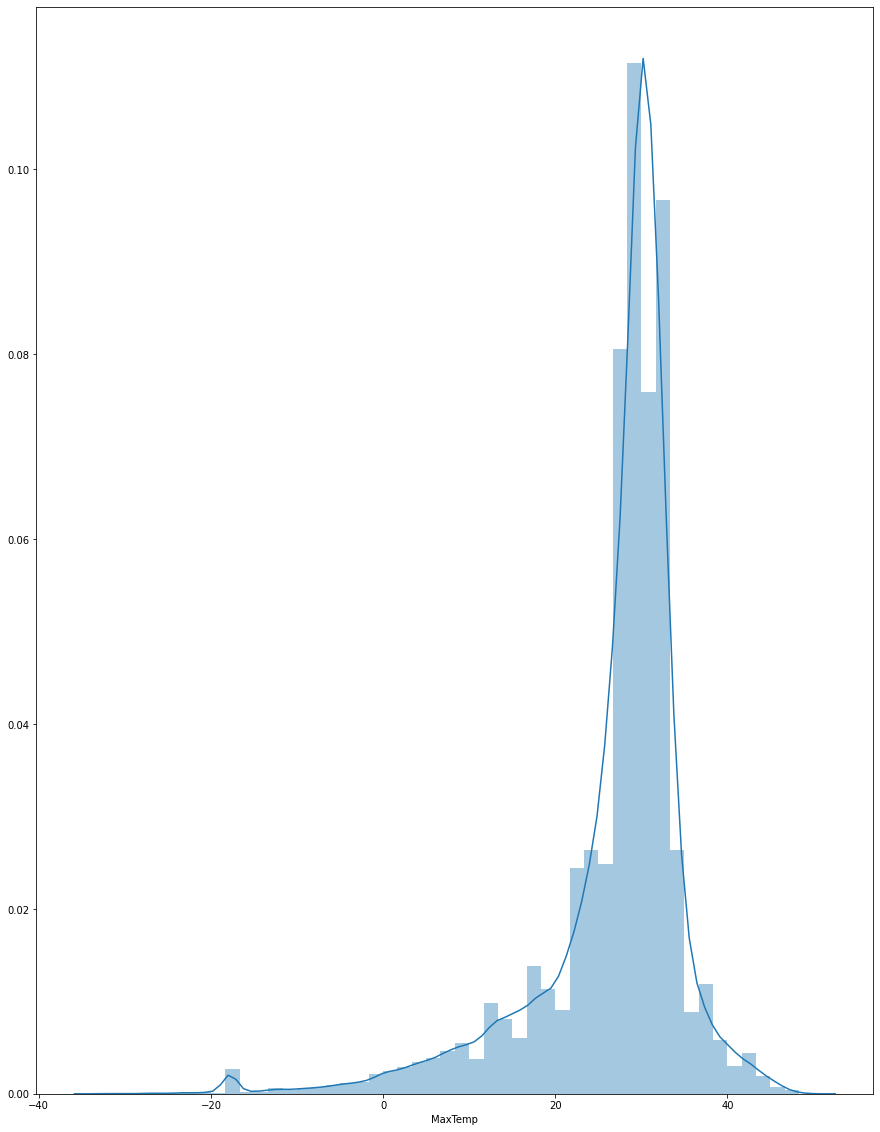

In [12]:
# Check the average max temperature.
pyplot.figure(figsize=(15, 20))
pyplot.tight_layout()
seaborn.distplot(raw_weather_dataset['MaxTemp'])

In [14]:
# Divide the data into "attributes" and "labels".
# The attributes are the independent variables, while the labels are dependent variables whose values will be predicted.
# We want to predict the MaxTemp based on the observed MinTemp.
X = raw_weather_dataset['MinTemp'].values.reshape(-1, 1)
y = raw_weather_dataset['MaxTemp'].values.reshape(-1, 1)

In [19]:
# Split 80% of the data to the training set, 20% to test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
regressor = LinearRegression()
# Train the algorithm.
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
# The linear regression model finds the best value for the intercept and slope, which results in a line that best fits the data.
# For every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.
print(regressor.intercept_)
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


In [22]:
# Make predictions based on the test data.
y_prediction = regressor.predict(X_test)

y_dataframe = pandas.DataFrame({'Actual':y_test.flatten(), 'Predicted': y_prediction.flatten()})
y_dataframe

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


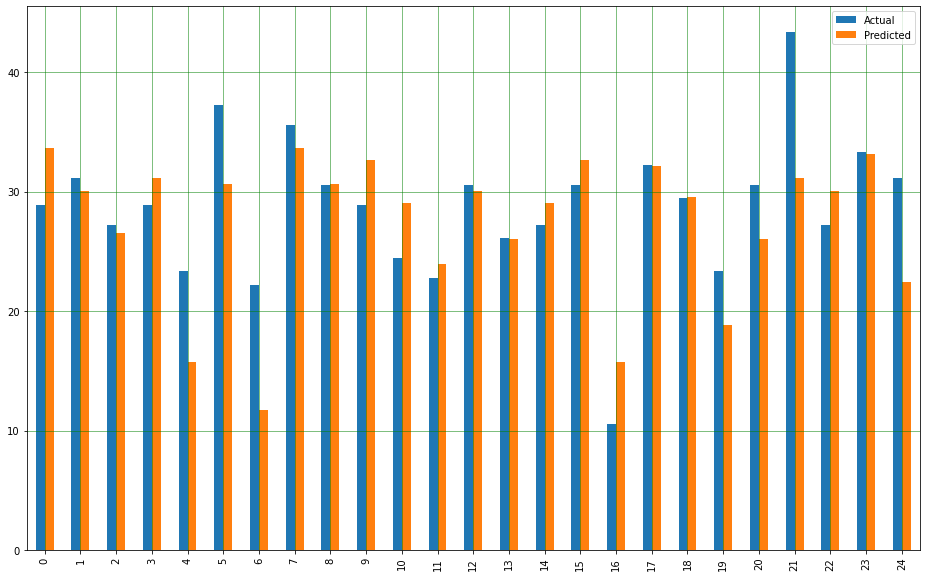

In [23]:
# Visualize the comparison result as a bar graph.
df1 = y_dataframe.head(25)
df1.plot(kind='bar', figsize=(16, 10))
pyplot.grid(which='major', linestyle='-', linewidth='0.5', color='green')
pyplot.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
pyplot.show()

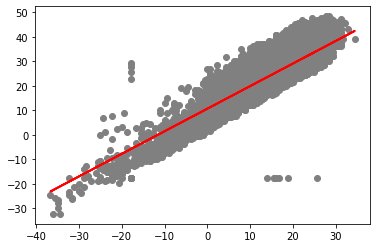

In [25]:
# Plot the "fitted" line against the dataset
pyplot.scatter(X_test, y_test, color='gray')
pyplot.plot(X_test, y_prediction, color='red', linewidth=2)
pyplot.show()